In [1]:
!pip install kaggle scikit-learn==1.4.1.post1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 43.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
!pip install tensorflow==2.16.0-rc0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Succes

In [21]:
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.3 MB/s eta 0:00:00


In [4]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!mkdir ~/.kaggle

In [6]:
!mv kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets list

ref                                                   title                                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------  --------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                    Vehicle Sales Data                       19MB  2024-02-21 20:16:17           8347        146  1.0              
zain280/car-dataset                                   Car Dataset                               1MB  2024-03-02 15:14:49           1768         27  1.0              
tarunrm09/climate-change-indicators                   Climate change Indicators                34KB  2024-02-22 08:53:54           4251         99  1.0              
mahad049/job-placement-dataset                        Job placement dataset                     6KB  2024-03-03 08:18:12           1235         28  0.9411765        
yami

In [19]:
!kaggle datasets download -d yasserh/twitter-tweets-sentiment-dataset

 81% 1.00M/1.23M [00:00<00:00, 2.04MB/s]
100% 1.23M/1.23M [00:00<00:00, 2.41MB/s]


In [20]:
!unzip twitter-tweets-sentiment-dataset.zip

Archive:  twitter-tweets-sentiment-dataset.zip
  inflating: Tweets.csv              


In [86]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import neattext.functions as nfx

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import accuracy_score

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Flatten, Dense

In [69]:
df = pd.read_csv('Tweets.csv')

In [70]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [71]:
df.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [72]:
df.dropna(inplace=True, axis=0)

In [73]:
# df['preprocessed_text'] = df['text'].apply(nfx.remove_special_characters)
df['preprocessed_text'] = df['text'].apply(nfx.remove_stopwords)
df['preprocessed_text'] = df['preprocessed_text'].apply(nfx.remove_hashtags)

In [74]:
df.head()

,textID,text,selected_text,sentiment,preprocessed_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"I`d responded, going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,Sooo SAD miss San Diego!!!
2,088c60f138,my boss is bullying me...,bullying me,negative,boss bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview! leave
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"Sons ****, couldn`t releases bought"


In [84]:
df['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

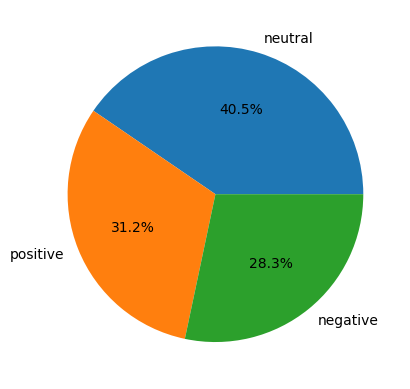

In [85]:
plt.pie(df['sentiment'].value_counts(), autopct='%1.1f%%', labels=['neutral', 'positive', 'negative'])
plt.show()

In [75]:
train_size = int(len(df['preprocessed_text']) * .8)

In [76]:
token = Tokenizer(num_words=1000, char_level=False)
token.fit_on_texts(df['preprocessed_text'])
train_sequences = token.texts_to_sequences(df['preprocessed_text'][:train_size])
test_sequences = token.texts_to_sequences(df['preprocessed_text'][train_size:])

In [77]:
x_train = pad_sequences(train_sequences, maxlen=100)
x_test = pad_sequences(test_sequences, maxlen=100)

In [78]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(df['sentiment'][:train_size])
y_test = encoder.transform(df['sentiment'][train_size:])

In [79]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [80]:
x_train.shape, y_train.shape

((21984, 100), (21984, 3))

In [81]:
encoder.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [87]:
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=50))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [88]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [89]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.fit(
    x_train, y_train,
    verbose=1,
    epochs=10,
    batch_size=32
)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.4538 - loss: 1.0388
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6950 - loss: 0.7505
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7062 - loss: 0.7149
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7267 - loss: 0.6801
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7415 - loss: 0.6379
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7644 - loss: 0.5898
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7844 - loss: 0.5467
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8002 - loss: 0.5126
Epoch 9/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8189 - loss: 0.4693
Epoch 10/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8256 - loss: 0.4489


In [92]:
results = model.history.history
results_df = pd.DataFrame(results)

In [93]:
results_df

,accuracy,loss
0,0.537027,0.954013
1,0.689501,0.759748
2,0.706104,0.719750
3,0.723071,0.683610
4,0.738310,0.645743
5,0.756778,0.605933
6,0.774654,0.565293
7,0.794259,0.523019
8,0.807132,0.491453
9,0.817686,0.462367


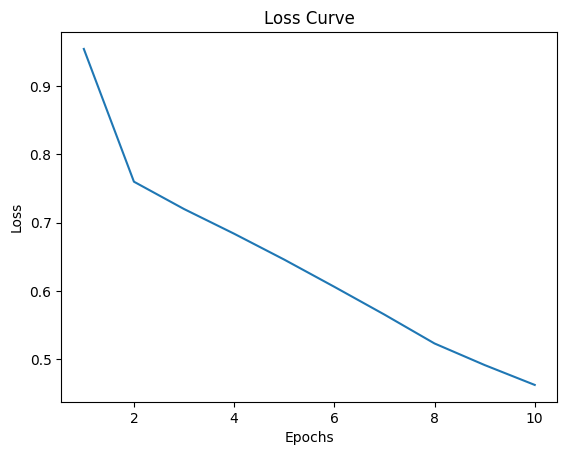

In [97]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, results_df['loss'])
plt.title('Loss Curve')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.show()

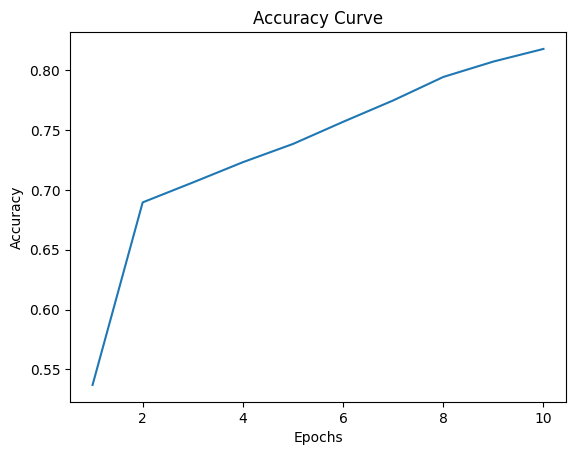

In [98]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, results_df['accuracy'])
plt.title('Accuracy Curve')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.show()

In [101]:
model.save('twitter_sentiment_analyser.keras')

In [102]:
import joblib
joblib.dump(token, 'Tokenizer.joblib')

['Tokenizer.joblib']